In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

## Generating Brownian Motion

Brownian motion from the normal distribution

In [2]:
def Monte_Carlo_Sample_Generation_Multi(T,M,d):
    return np.random.normal(0,np.sqrt(T),(M,d))

## Simulating porfolio value movement

In [3]:
def Portfolio_Simulation(r,S,T,sigma,W_T,M,d,amount_of_stock):
    if np.sum(w)==1: #We require the weighted average to add up to 1
            Smat=np.zeros((d,M)) #Starting our final S as a vector of zeros shape d x M
            portfolio_values=np.zeros(M)
            for i in range(d):
                    Smat[i]=S[i]*np.exp((sigma[i]*W_T[:,i])+(r-0.5*sigma[i]**2)*T) 
                    #For each underlying stock we apply our stock price formula
    return Smat.T@amount_of_stock #Multiplying our simulated stock prices by the amount of each stock in the portfolio

In [4]:
r=0.1 #Interest rate
S_a,S_b,S_c,S_d=50,60,70,80 #Initial stock prices
S=[S_a,S_b,S_c,S_d] #List of the starting stock prices
T=31/365 #1 year
sig_a, sig_b, sig_c, sig_d=0.15,0.3,0.6,0.2 #Annual volatility for each underlying
sigma=[sig_a,sig_b,sig_c,sig_d] 
M=10000 #Simulations
d=4 #Dimensions i.e number of stocks
w=[0.4,0.25,0.25,0.1] #Weights

In [5]:
Initial_Portfolio_Value=1000000 #The intial portfolio value
Portfolio_Value_Split=[Initial_Portfolio_Value*w[i] for i in range(d)] #How the value is split across the different assets
Amount_Of_Stock=[Portfolio_Value_Split[i]/S[i] for i in range(d)] #The amount each asset held in the portfolio

In [6]:
W_T=Monte_Carlo_Sample_Generation_Multi(T,M,d) #Generating Brownian motion
Portfolios=Portfolio_Simulation(r,S,T,sigma,W_T,M,d,Amount_Of_Stock) #Simulating the portfolio for M number of simulations
Portfolio_Returns=np.sort(Portfolios-Initial_Portfolio_Value) #Calculating and arranging the returns 

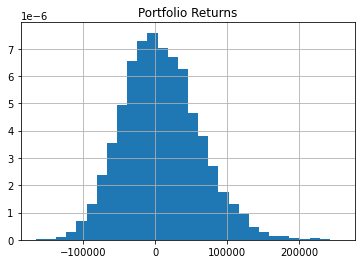

In [7]:
plt.hist(Portfolio_Returns, density=1, bins=30) #Plotting the histogram of the Portfolio Returns
plt.title('Portfolio Returns')
plt.grid();

In [8]:
perc_level=[1,2.5,5] #The Percentage levels
Value_at_Risk=scs.scoreatpercentile(Portfolio_Returns,perc_level) #The Value at Risk is the corresponding lowest x percentile
print('%14s %12s' %('Confidence Level(%)', 'VaR($)'))
print(28*'-')
for pair in zip(perc_level, Value_at_Risk):
    print('%14.2f %14.2f' %(100 - pair[0], -pair[1]))

Confidence Level(%)       VaR($)
----------------------------
         99.00      103176.39
         97.50       87170.38
         95.00       73191.17
